In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
#import plotly.offline as py
#import plotly.tools as tls
#from statsmodels.stats import weightstats as stests
from scipy import stats

import datetime
from datetime import datetime
import statistics as es 
import csv
import re 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
student_scope = pd.read_csv ("students_filtered.csv")
dataset_final = pd.read_csv ("dataset_final.csv")
dataset = pd.read_csv("dataset.csv")


In [5]:
fenem= ['NU_INSCRICAO','CO_ESCOLA','Q001','Q002','Q003','Q004','Q005','Q006', 'Q007', 'Q008', 'Q009', 'Q010', 
        'Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025',
        'Q026','Q027', 'TP_COR_RACA',
        'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
       'IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO','TP_ESTADO_CIVIL', 'TP_NACIONALIDADE', 'TP_SEXO', 
        'NU_IDADE']
enem18a=pd.read_csv("~/data/Enem/MICRODADOS_ENEM_2018.csv", sep=';',encoding="iso-8859-2", usecols = fenem)

In [6]:
student_scope = pd.merge( student_scope,enem18a, on='NU_INSCRICAO', how='left')

In [18]:
censo18a=pd.read_csv("~/data/censo2018/ESCOLAS.CSV", sep='|', encoding="iso-8859-2")

In [27]:
enem18 = pd.merge(student_scope, censo18a, left_on='CO_ESCOLA', right_on='CO_ENTIDADE', how='left')

In [28]:
#Creating average of students in all fields
enem18['AVG_SCORE'] = (enem18.NU_NOTA_CN + enem18.NU_NOTA_CH + enem18.NU_NOTA_LC + enem18.NU_NOTA_MT + enem18.NU_NOTA_REDACAO)/5
enem18['AVG_SCORE_SCHOOL'] = enem18.groupby(['CO_ESCOLA'])['AVG_SCORE'].transform('mean') 
temp18 = enem18.drop_duplicates(['CO_ESCOLA'])
temp18['TARGET'] = pd.qcut (temp18.AVG_SCORE_SCHOOL, 4, labels = [1,2,3,4]).map(lambda x : 0 if x!=4 else 1) 
enem18= pd.merge(temp18[['CO_ESCOLA', 'TARGET']], enem18, left_on='CO_ESCOLA', right_on='CO_ESCOLA', how='right')

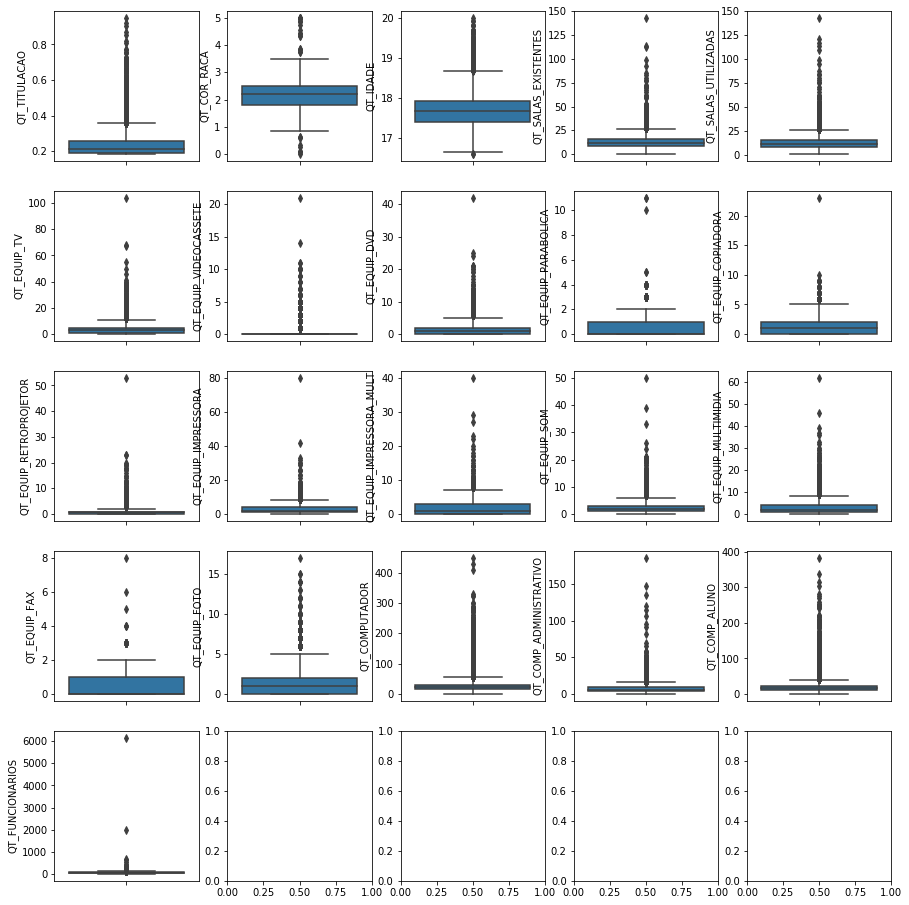

In [9]:
# Dataset Before treatment of oultliers and correlation
quantitative = dataset.filter(regex = 'QT', axis=1).columns
fig, ax = plt.subplots(5, 5, figsize=(15, 16))
for var, subplot in zip(quantitative, ax.flatten()):
    sns.boxplot(y=var, data=dataset, ax=subplot)

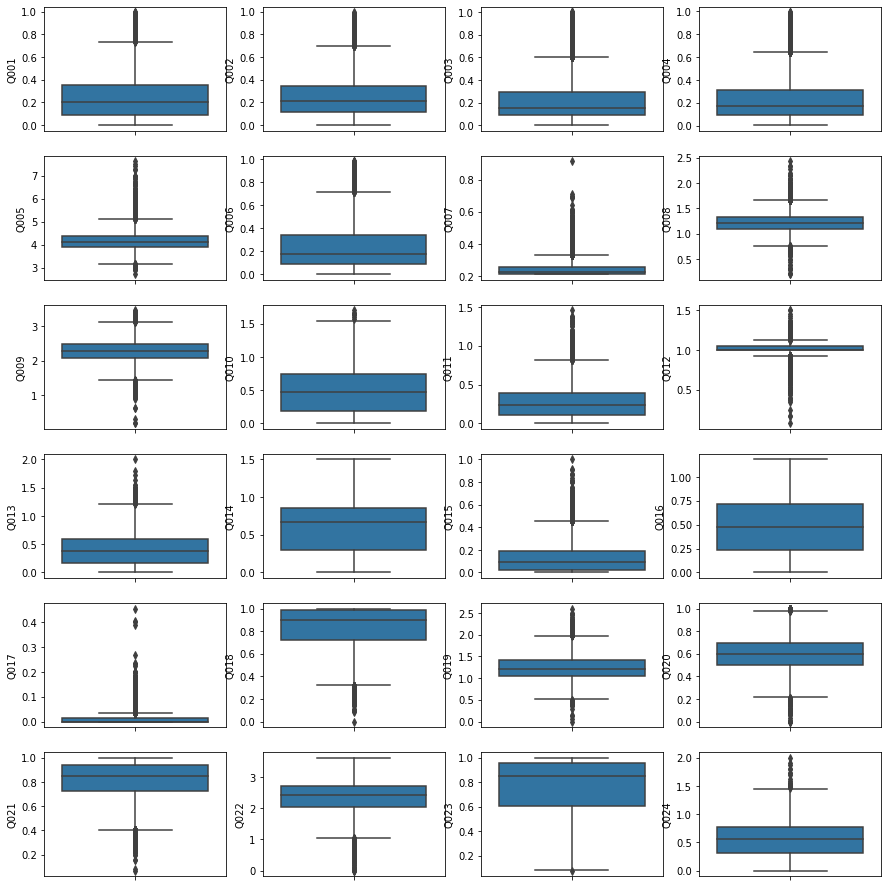

In [27]:
#Before treatment
quantitative = dataset.filter(regex = 'Q0', axis=1).columns
fig, ax = plt.subplots(6, 4, figsize=(15, 16))
for var, subplot in zip(quantitative, ax.flatten()):
    sns.boxplot(y=var, data=dataset, ax=subplot)

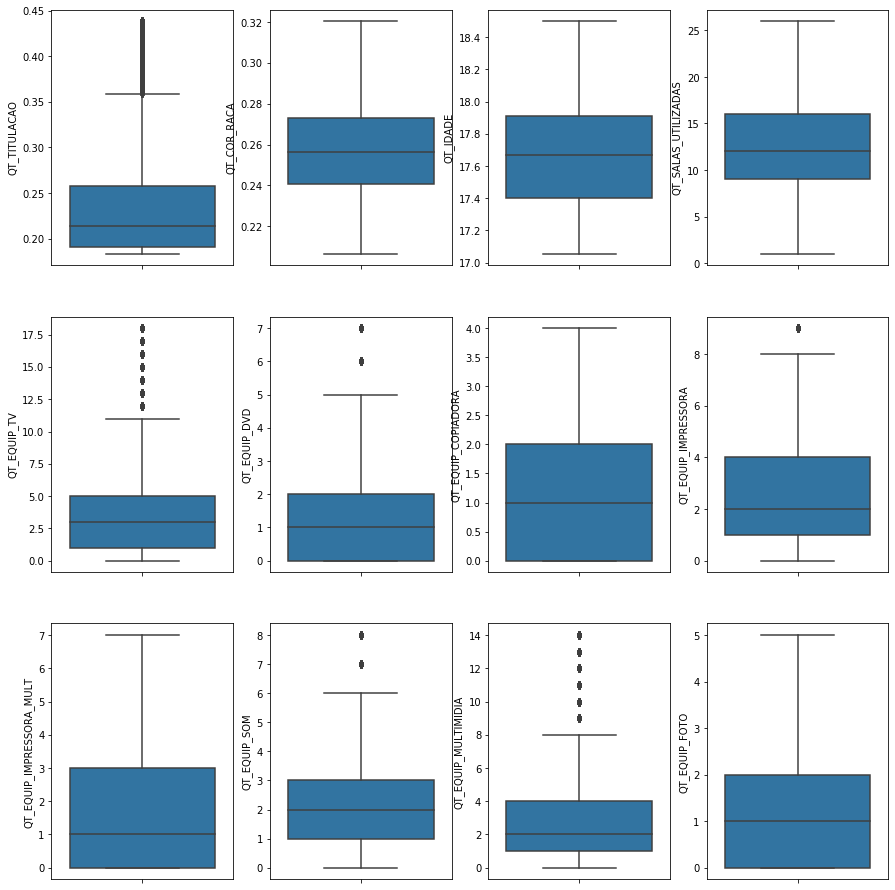

In [32]:
quantitative = dataset_final.filter(regex = 'QT', axis=1).columns
fig, ax = plt.subplots(3, 4, figsize=(15, 16))
for var, subplot in zip(quantitative, ax.flatten()):
    sns.boxplot(y=var, data=dataset_final, ax=subplot)


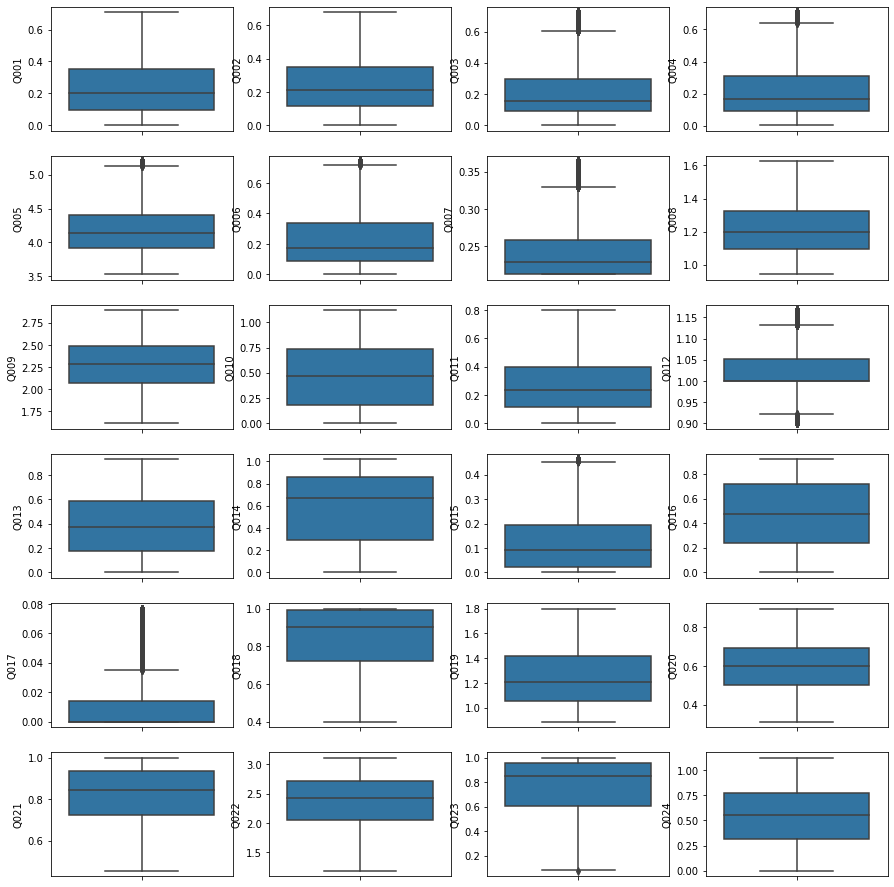

In [33]:
#After outilers treatment
quantitative = dataset_final.filter(regex = 'Q0', axis=1).columns
fig, ax = plt.subplots(6, 4, figsize=(15, 16))
for var, subplot in zip(quantitative, ax.flatten()):
    sns.boxplot(y=var, data=dataset_final, ax=subplot)

In [13]:
dataset_final.head(2)

,Q001,Q002,QT_TITULACAO,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,QT_COR_RACA,QT_IDADE,IN_AGUA_FILTRADA,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_QUADRA_ESPORTES,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_PNE,IN_DEPENDENCIAS_PNE,IN_BANHEIRO_CHUVEIRO,IN_REFEITORIO,IN_DESPENSA,IN_ALMOXARIFADO,IN_AUDITORIO,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_AREA_VERDE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_EQUIP_IMPRESSORA_MULT,QT_EQUIP_SOM,QT_EQUIP_MULTIMIDIA,QT_EQUIP_FOTO,QT_COMP_ALUNO,IN_BANDA_LARGA,QT_FUNCIONARIOS,TARGET
0,0.304298,0.176767,0.224855,0.169913,0.377012,5.200000,0.120046,0.212366,1.029630,2.000000,0.000000,0.000000,1.000000,0.029630,0.659259,0.000000,0.007407,0.0,1.000000,1.000000,0.31250,1.00000,1.933333,0.992593,0.014815,0.905650,0.268605,18.348148,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,18.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,10.0,1.0,122.0,0
1,0.021968,0.036028,0.187727,0.071404,0.067398,4.433735,0.076538,0.212366,1.192771,1.987952,0.108434,0.457831,1.036145,0.048193,0.216867,0.012048,0.156627,0.0,0.975904,1.361446,0.60241,0.73494,2.253012,1.000000,0.204819,0.626506,0.274659,17.843373,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,10.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,10.0,0.0,43.0,0


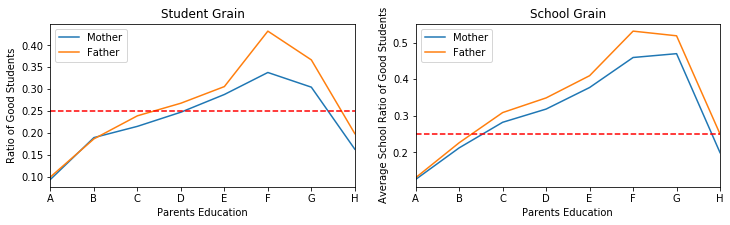

In [149]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,3))


ax1= enem18.drop_duplicates('CO_ESCOLA').groupby('Q002').mean().TARGET[:200].plot(ax=ax1)
ax1= enem18.drop_duplicates('CO_ESCOLA').groupby('Q001').mean().TARGET[:200].plot(ax=ax1)
ax1.axhline(y=0.25, color='r', linestyle='--')

ax1.set_xlabel("Parents Education")
ax1.set_ylabel("Ratio of Good Students")
ax1.set_title("Student Grain")
ax1.legend(["Mother", "Father"]);


ax2 = enem18.groupby('Q002').mean().TARGET[:200].plot()
ax2 = enem18.groupby('Q001').mean().TARGET[:200].plot()
ax2.axhline(y=0.25, color='r', linestyle='--')

ax2.set_ylabel("Average School Ratio of Good Students")
ax2.set_xlabel("Parents Education")
ax2.set_title("School Grain")
ax2.legend(["Mother", "Father"]);

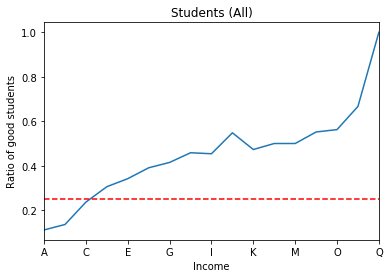

In [153]:
ax = enem18.drop_duplicates('CO_ESCOLA').groupby('Q006').mean().TARGET[:200].plot()
ax.set_ylabel("Ratio of good students")
ax.set_xlabel("Income")
ax.set_title("Students (All)")
ax.axhline(y=0.25, color='r', linestyle='--')

In [41]:
print(enem18[enem18['Q001']=='H'].Q001.value_counts())
enem18[enem18['Q002']=='H'].Q002.value_counts()

#(enem18['Q002']=='H').value_counts()


Series([], Name: Q001, dtype: int64)


Series([], Name: Q002, dtype: int64)

In [40]:
enem18['Q001'] = enem18['Q001'].apply(lambda x : 'A' if x=='H' else x)
enem18['Q002'] = enem18['Q002'].apply(lambda x : 'A' if x=='H' else x)

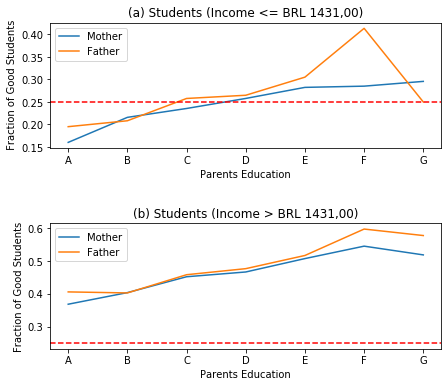

In [59]:
#enem18['Q006'] = enem18['Q006'].apply(lambda x : 'A' if x=='H' else x)
poor = enem18.loc[(enem18['Q006']=='A') | (enem18['Q006']=='B')| (enem18['Q006']== 'C')]
rich = enem18[~enem18.index.isin(poor.index)]


#fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,3))

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (7,6))



ax1= poor.drop_duplicates('CO_ESCOLA').groupby('Q002').mean().TARGET[:200].plot(ax=ax1)
ax1= poor.drop_duplicates('CO_ESCOLA').groupby('Q001').mean().TARGET[:200].plot(ax=ax1)
ax1.axhline(y=0.25, color='r', linestyle='--')


ax1.set_xlabel("Parents Education")
ax1.set_ylabel(" Fraction of Good Students")
ax1.set_title("(a) Students (Income <= BRL 1431,00)")
ax1.legend(["Mother", "Father"]);


ax2 = rich.groupby('Q002').mean().TARGET[:200].plot()
ax2 = rich.groupby('Q001').mean().TARGET[:200].plot()
ax2.axhline(y=0.25, color='r', linestyle='--')

ax2.set_ylabel("Fraction of Good Students")
ax2.set_xlabel("Parents Education")
ax2.set_title("(b) Students (Income > BRL 1431,00)")
ax2.legend(["Mother", "Father"]);


plt.subplots_adjust(hspace=0.6)
plt.show()


In [24]:
rich.shape[0]/enem18.shape[0]

0.32997577418604934

In [5]:
socioeconomic =(["Q003","Q004","Q005","Q006", 'Q007',"Q008","Q009","Q010","Q011","Q012","Q013","Q014",
                "Q015","Q016","Q017","Q018","Q019","Q020","Q021","Q022","Q023","Q024","Q025",
                 'TP_COR_RACA'])
infrastructure = (['IN_AGUA_FILTRADA',
 'IN_ESGOTO_REDE_PUBLICA',
 'IN_ESGOTO_FOSSA',
 'IN_LABORATORIO_INFORMATICA',
 'IN_LABORATORIO_CIENCIAS',
 'IN_SALA_ATENDIMENTO_ESPECIAL',
 'IN_QUADRA_ESPORTES_COBERTA',
 'IN_QUADRA_ESPORTES_DESCOBERTA',
 'IN_QUADRA_ESPORTES',
 'IN_BIBLIOTECA',
 'IN_SALA_LEITURA',
 'IN_BANHEIRO_FORA_PREDIO',
 'IN_BANHEIRO_PNE',
 'IN_DEPENDENCIAS_PNE',
 'IN_BANHEIRO_CHUVEIRO',
 'IN_REFEITORIO',
 'IN_DESPENSA',
 'IN_ALMOXARIFADO',
 'IN_AUDITORIO',
 'IN_PATIO_COBERTO',
 'IN_PATIO_DESCOBERTO',
 'IN_AREA_VERDE',
 'QT_SALAS_UTILIZADAS',
 'QT_EQUIP_TV',
 'QT_EQUIP_DVD',
 'QT_EQUIP_COPIADORA',
 'QT_EQUIP_IMPRESSORA',
 'QT_EQUIP_IMPRESSORA_MULT',
 'QT_EQUIP_SOM',
 'QT_EQUIP_MULTIMIDIA',
 'QT_EQUIP_FOTO',
 'QT_COMP_ALUNO',
 'IN_BANDA_LARGA',
 'QT_FUNCIONARIOS'])

target = (['TARGET'])

X = dataset_final[infrastructure]
y = dataset_final[target]

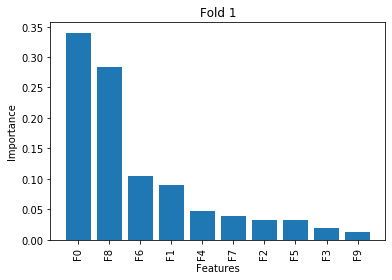

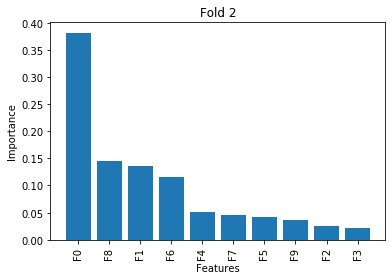

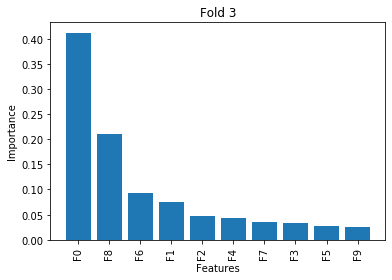

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification

# dummy classification dataset
X, y = make_classification(n_features=10)
# dummy feature names
feature_names = ['F{}'.format(i) for i in range(X.shape[1])]

kf = KFold(n_splits=3)
rfc = RandomForestClassifier()
count = 1
# test data is not needed for fitting
for train, _ in kf.split(X, y):
    rfc.fit(X[train, :], y[train])
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rfc.feature_importances_)[::-1]
    feature_labels = [feature_names[i] for i in importances_index_desc]
    # plot
    plt.figure()
    plt.bar(feature_labels, rfc.feature_importances_[importances_index_desc])
    plt.xticks(feature_labels, rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()

ValueError: Could not interpret input 'Q002'

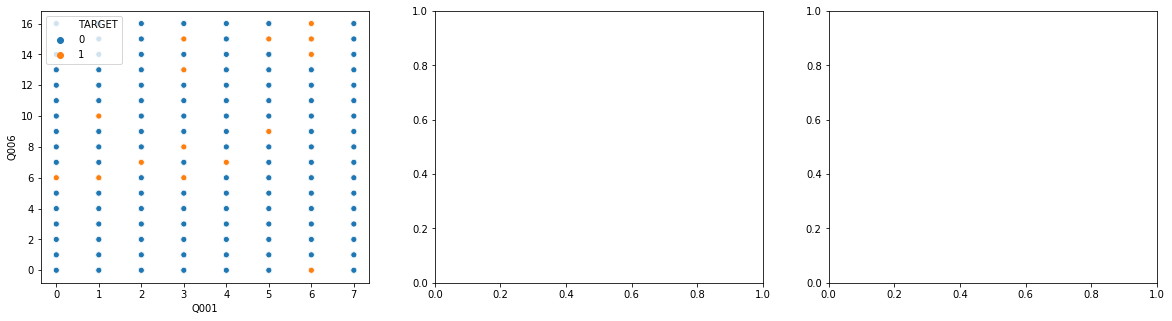

In [82]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(20, 5)
sns.scatterplot(x="Q001", y="Q006", data=df, hue = 'TARGET', ax=ax[0])
sns.scatterplot(x="Q002", y="Q006", data=df, hue = 'TARGET',ax=ax[1])
#sns.scatterplot(x="Q002", y="TITULACAO", data=df, hue = 'TARGET',ax=ax[2])

fig.show()

In [140]:
a = enem18.loc[(enem18.QT_COMPUTADOR <=90) & (enem18.QT_COMP_ALUNO <=90)] 


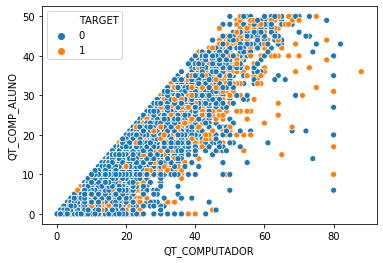

In [139]:
sns.scatterplot(x="QT_COMPUTADOR", y="QT_COMP_ALUNO", data=a.drop_duplicates('CO_ESCOLA'), hue = 'TARGET')

In [170]:
dataset = pd.read_csv ("dataset.csv")
dataset.rename(columns={'TP_COR_RACA':'QT_COR_RACA'}, inplace = True)

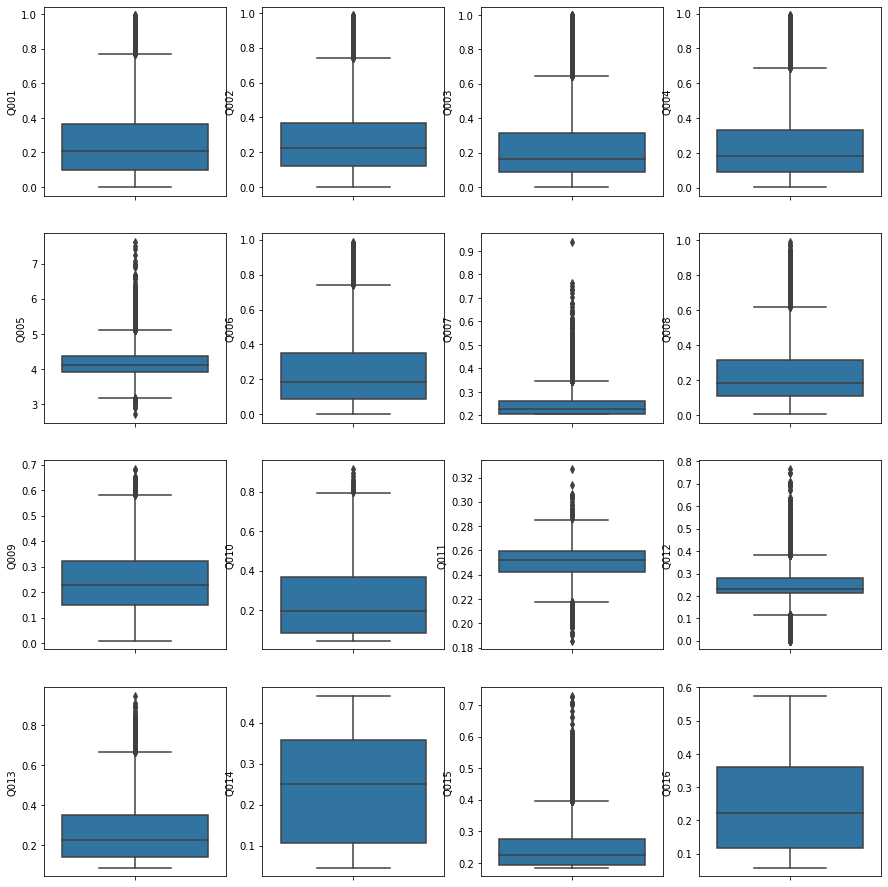

In [173]:
socio = dataset.filter(regex = 'Q0', axis=1).columns
fig, ax = plt.subplots(4, 4, figsize=(15, 16))
for var, subplot in zip(socio, ax.flatten()):
    sns.boxplot(y=var, data=dataset, ax=subplot)

In [180]:
dataset.loc[dataset.Q007 > 0.35].count()

Q001               653
Q002               653
TITULACAO          653
Q003               653
Q004               653
                  ... 
QT_FUNCIONARIOS    653
IN_ALIMENTACAO     653
TP_DEPENDENCIA     653
TP_LOCALIZACAO     653
TARGET             653
Length: 99, dtype: int64

In [ ]:
infrastructure = dataset.loc[:, dataset.columns.isin(infrastructure)].columns.to_list()

In [ ]:
cor = dataset[infrastructure].corr()
ax = sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(40, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

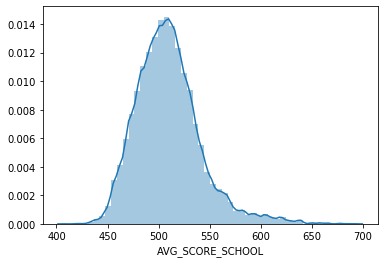

In [74]:
sns.distplot(enem18.AVG_SCORE_SCHOOL)

In [75]:
enem18.TITULACAO

AttributeError: 'DataFrame' object has no attribute 'TITULACAO'

In [ ]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(20, 5)
sns.scatterplot(x="Q001", y="Q002", data=input, hue = 'TARGET', ax=ax[0])
sns.scatterplot(x="Q001", y="TITULACAO", data=input, hue = 'TARGET',ax=ax[1])
sns.scatterplot(x="Q002", y="TITULACAO", data=input, hue = 'TARGET',ax=ax[2])

fig.show()

In [ ]:
input.groupby('QT_FUNCIONARIOS').mean().TARGET.plot()